# Number of duplicated requests for different timeouts

- Initial Node Number: 500
- Network Delay Mean: 0.2
- Protocol Mode: Iterative
- Successor list size: 18
- Lookup Generation Probability: 0.2
- Failure Frequency Mean (Poisson Distribution): 0
- Voluntary Leave Frequency Mean (Poisson Distribution): 0
- Joining Frequency Mean: 0.0
- Stabilize Interval: 15
- Check Predecessor Interval: 15
- Timeout Local Lookup: 10, 15, 20, 25, 30
- Timeout Global Lookup: MAX
- Timeout Stabilize: 10, 15, 20, 25, 30
- Timeout Check Predecessor: 10, 15, 20, 25, 30
- Pptimization: Notify Predecessor: True
- Number of iterations: 500

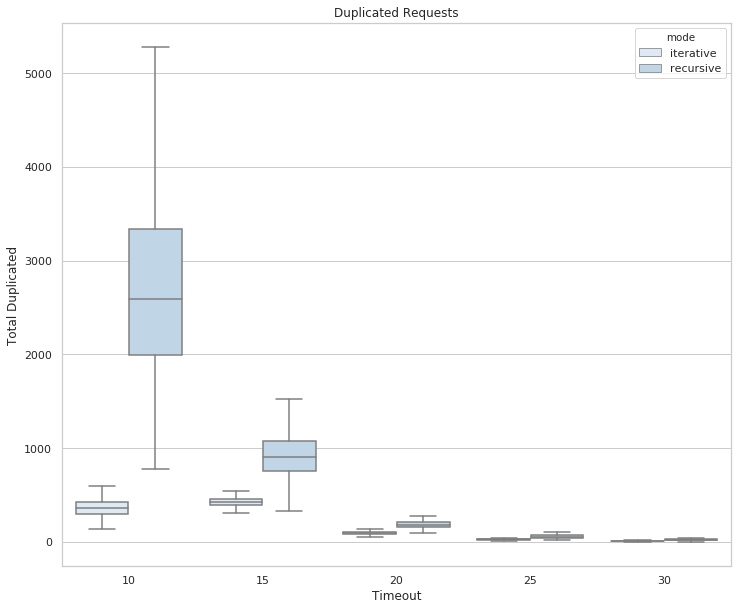

In [1]:
import os
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
sns.set_palette(sns.color_palette("Blues"))
%matplotlib inline

def plot_duplicated_requests(df):
    by_node_id_and_timeout = df.groupby(["node_id", "timeout", "mode"], as_index=False).sum()
    plt.figure(figsize=(12, 10))
    ax = sns.boxplot(x="timeout", y="expired_requests", hue="mode", data=by_node_id_and_timeout, showfliers=False)
    
    # Customize the axes and title
    ax.set_title("Duplicated Requests")
    ax.set_xlabel("Timeout")
    ax.set_ylabel("Total Duplicated")
    fig = ax.get_figure()
    fig.savefig("duplicated_requests.png")
        
def read_csv(data_dir):
    df_list = []

    for filename in os.listdir(data_dir):
        if filename.startswith("expired_requests"):
            mode = filename.split(".")[1]
            timeout = int(filename.split(".")[2])
            df = pd.read_csv(data_dir + filename)
            df["mode"] = mode
            df["timeout"] = timeout
            df_list.append(df)
            
    df = pd.concat(df_list)
        
    return df
            
df = read_csv("data/")
plot_duplicated_requests(df)

# Number of non-stabilized nodes for different values of timeouts

- Initial Node Number: 100
- Network Delay Mean: 0.2
- Protocol Mode: Iterative
- Successor list size: 13
- Lookup Generation Probability: 0.2
- Failure Frequency Mean (Poisson Distribution): 0
- Voluntary Leave Frequency Mean (Poisson Distribution): [0.1, 0.2, 0.3, 0.4]
- Joining Frequency Mean: [0.1, 0.2, 0.3, 0.4]
- Stabilize Interval: 30
- Check Predecessor Interval: 30
- Timeout Local Lookup: 25
- Timeout Global Lookup: 90
- Timeout Stabilize: 25
- Timeout Check Predecessor: 25
- Pptimization: Notify Predecessor: True

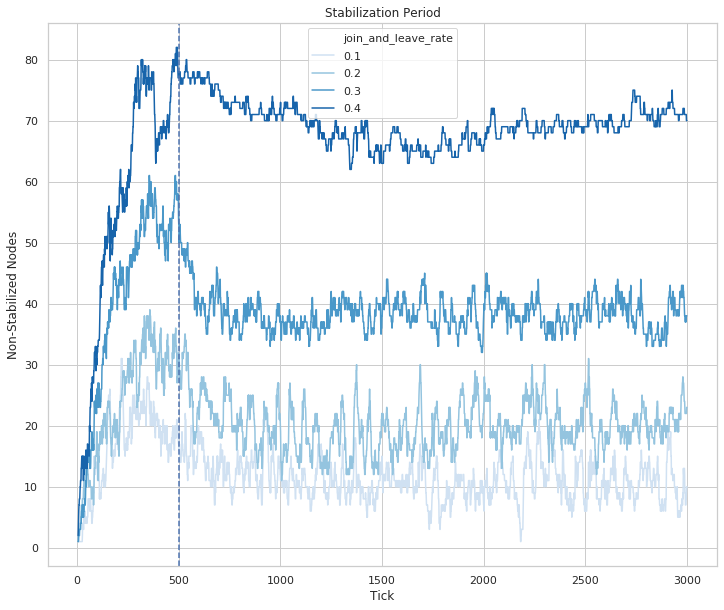

In [2]:
import os
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
sns.palplot(sns.color_palette("Blues"))
%matplotlib inline

def plot_stabilization_period(df, mode):
    df = df.loc[df['mode'] == mode]
    df = df.loc[df['tick'] <= 3000]
    by_tick = df.groupby(["tick", "mode", "join_and_leave_rate"], as_index=False).sum()
    plt.figure(figsize=(12, 10))
    ax = sns.lineplot(x="tick", y="non_stabilized_nodes", hue="join_and_leave_rate", data=by_tick, palette=sns.color_palette("Blues", n_colors=4), hue_order=["$0.1$", "$0.2$", "$0.3$", "$0.4$"])
    
    # Customize the axes and title
    ax.set_title("Stabilization Period")
    ax.set_xlabel("Tick")
    ax.set_ylabel("Non-Stabilized Nodes")
    ax.axvline(500, color='b', linestyle='--')
    fig = ax.get_figure()
    fig.savefig("stabilization_period_%s.png" % mode)
    
def read_csv(data_dir, csv_name):
    df_list = []

    for filename in os.listdir(data_dir):
        if filename.startswith(csv_name):
            mode = filename.split(".")[1]
            join_rate = float(filename.split(".")[2].replace(",", "."))
            leave_rate = float(filename.split(".")[3].replace(",", "."))
            assert join_rate == leave_rate
            join_and_leave_rate = join_rate
            df = pd.read_csv(data_dir + filename)
            df["mode"] = mode
            df["join_and_leave_rate"] = join_and_leave_rate
            df["join_and_leave_rate"] = ["$%s$" % x for x in df["join_and_leave_rate"]]
            df_list.append(df)
            
    df = pd.concat(df_list)
        
    return df
            
df = read_csv("data/", "stabilization_period")
plot_stabilization_period(df, "recursive")

# Number of non-stabilized nodes for different values of stabilize interval

- Initial Node Number: 100
- Network Delay Mean: 0.2
- Protocol Mode: Iterative
- Successor list size: 13
- Lookup Generation Probability: 0.2
- Failure Frequency Mean (Poisson Distribution): 0.1
- Voluntary Leave Frequency Mean (Poisson Distribution): 0.2
- Joining Frequency Mean: 0.3
- Stabilize Interval: (5, 10, 15, 20, 25, 30, 35)
- Check Predecessor Interval: (5, 10, 15, 20, 25, 30, 35)
- Timeout Local Lookup: 30
- Timeout Global Lookup: 90
- Timeout Stabilize: 30
- Timeout Check Predecessor: 30
- Pptimization: Notify Predecessor: True

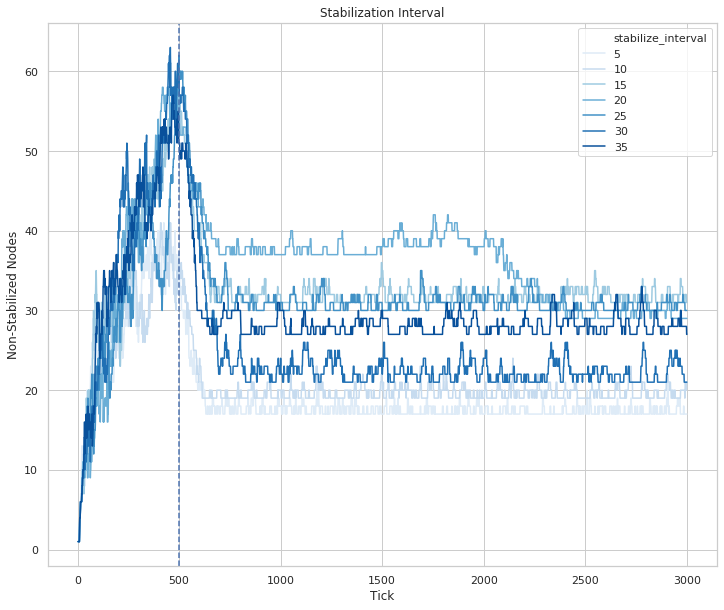

In [3]:
import os
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
sns.palplot(sns.color_palette("Blues"))
%matplotlib inline

def plot_stabilization_period(df, mode):
    df = df.loc[df['mode'] == mode]
    df = df.loc[df['tick'] <= 3000]
    by_tick = df.groupby(["tick", "mode", "stabilize_interval"], as_index=False).sum()
    plt.figure(figsize=(12, 10))
    ax = sns.lineplot(x="tick", y="non_stabilized_nodes", hue="stabilize_interval", data=by_tick, palette=sns.color_palette("Blues", n_colors=7))
    
    # Customize the axes and title
    ax.set_title("Stabilization Interval")
    ax.set_xlabel("Tick")
    ax.set_ylabel("Non-Stabilized Nodes")
    ax.axvline(500, color='b', linestyle='--')
    fig = ax.get_figure()
    fig.savefig("stabilization_interval_%s.png" % mode)
    
def read_csv(data_dir, csv_name):
    df_list = []

    for filename in os.listdir(data_dir):
        if filename.startswith(csv_name):
            mode = filename.split(".")[1]
            stabilize_interval = int(filename.split(".")[2])
            df = pd.read_csv(data_dir + filename)
            df["mode"] = mode
            df["stabilize_interval"] = stabilize_interval
            df_list.append(df)
            
    df = pd.concat(df_list)
        
    return df
            
df = read_csv("data/", "stabilization_interval")
plot_stabilization_period(df, "iterative")

# Lookup time for differet N

- Initial Node Number: variable
- Network Delay Mean: 0.2
- Protocol Mode: variable
- Successor list size: 2logN 
- Lookup Generation Probability: 0.2
- Failure Frequency Mean (Poisson Distribution): 0
- Voluntary Leave Frequency Mean (Poisson Distribution): 0
- Joining Frequency Mean: 0
- Stabilize Interval: 30
- Check Predecessor Interval: 30
- Fix Finger Interval: 30
- Timeout Local Lookup: 25
- Timout Global Lookup: MAX
- Timout Stabilize: 25
- Timout Check Predecessor: 25
- Optimization: Notify Predecessor: True

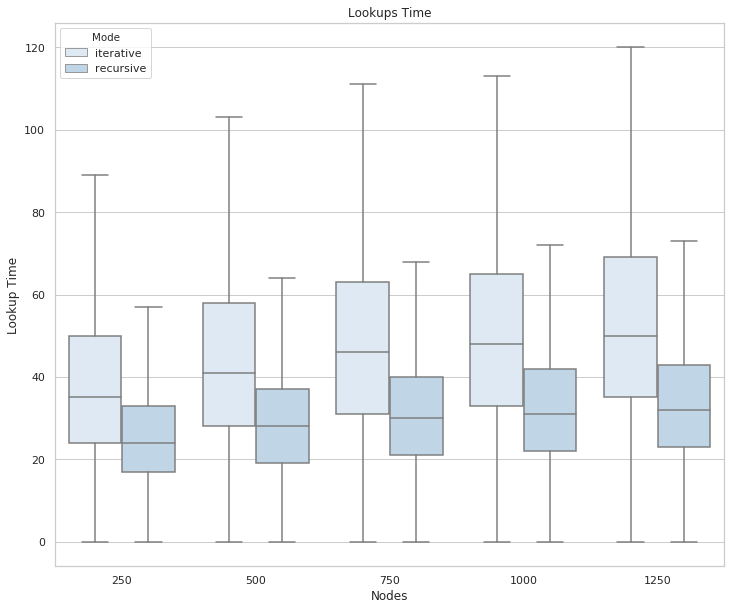

In [4]:
import os
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
sns.set_palette(sns.color_palette("Blues"))
%matplotlib inline

def plot_lookups_time(dfe):
    plt.figure(figsize=(12, 10))
    ax = sns.boxplot(x="Nodes", y="Lookup Time", hue="Mode", data=dfe, showfliers=False)
     # Customize the axes and title
    ax.set_title("Lookups Time")
    ax.set_xlabel("Nodes")
    ax.set_ylabel("Lookup Time")
    fig = ax.get_figure()
    fig.savefig("duplicated_requests.png")


df_list = []
for filename in os.listdir("data"):
    if filename.startswith("lookupsTime"):
        if len(filename.split(".")) == 4:
            df = pd.read_csv("data/" + filename)
            df["Mode"] = filename.split(".")[2]
            df["Nodes"] = int(filename.split(".")[1])
            df_list.append(df)
        
dfe = pd.concat(df_list)
plot_lookups_time(dfe)

# Lookup time for leave - join probabilities

- Initial Node Number: 500
- Network Delay Mean: 0.2
- Protocol Mode: variable
- Successor list size: 2logN 
- Lookup Generation Probability: 0.2
- Failure Frequency Mean (Poisson Distribution): variable
- Voluntary Leave Frequency Mean (Poisson Distribution): variable
- Joining Frequency Mean: variable
- Stabilize Interval: 4
- Check Predecessor Interval: 4
- Timeout Local Lookup: 3
- Timout Global Lookup: MAX
- Timout Stabilize: 3
- Timout Check Predecessor: 3
- Optimization: Notify Predecessor: True

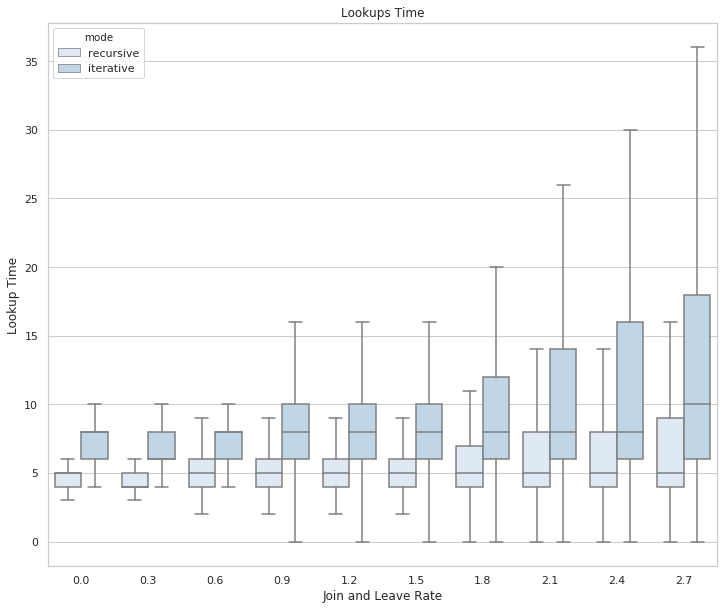

In [5]:
import os
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
sns.set_palette(sns.color_palette("Blues"))
%matplotlib inline

def plot_lookups_time(dfe):
    plt.figure(figsize=(12, 10))
    ax = sns.boxplot(x="join_and_leave_rate", y="Lookup Time", hue="mode", data=dfe, showfliers=False)
     # Customize the axes and title
    ax.set_title("Lookups Time")
    ax.set_xlabel("Join and Leave Rate")
    ax.set_ylabel("Lookup Time")
    fig = ax.get_figure()



df_list = []

for filename in os.listdir("data"):
    if filename.startswith("lookupsTime"):
        if len(filename.split(".")) == 5:
            mode = filename.split(".")[1]
            join_rate = float(filename.split(".")[2].replace(",", "."))
            leave_rate = float(filename.split(".")[3].replace(",", "."))
            join_and_leave_rate = join_rate
            df = pd.read_csv("data/" + filename)
            df["mode"] = mode
            df["join_and_leave_rate"] = join_and_leave_rate
            df_list.append(df)
dfe = pd.concat(df_list)
plot_lookups_time(dfe)

# Lookup path length for different lookup nodes number

- Initial Node Number: variable
- Network Delay Mean: 0
- Protocol Mode: iterative
- Successor list size: 2logN 
- Lookup Generation Probability: 0
- Failure Frequency Mean (Poisson Distribution): 0
- Voluntary Leave Frequency Mean (Poisson Distribution): 0
- Joining Frequency Mean: 0
- Stabilize Interval: 4
- Check Predecessor Interval: 4
- Timeout Local Lookup: 3
- Timout Global Lookup: MAX
- Timout Stabilize: 3
- Timout Check Predecessor: 3
- Optimization: Notify Predecessor: True

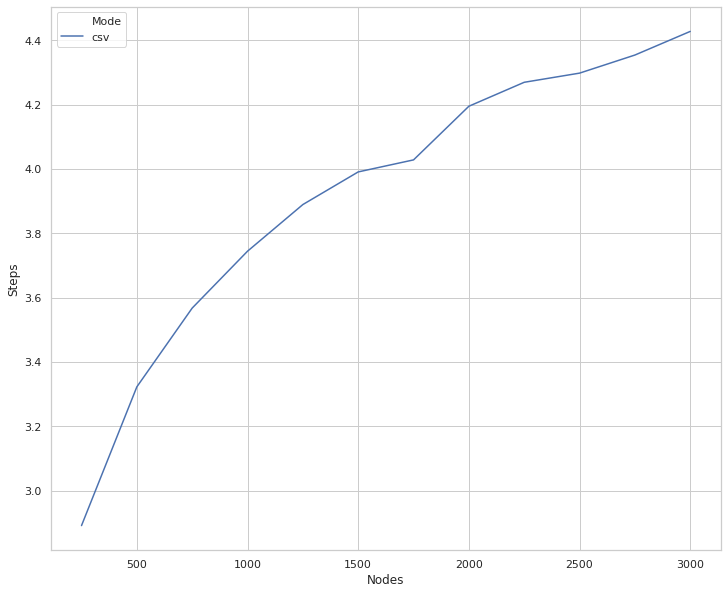

In [9]:


import os
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
%matplotlib inline

def plot_lookups_steps(dfe):
    dfe = dfe.groupby(["Nodes", "Mode"], as_index=False).mean()
    plt.figure(figsize=(12, 10))
    sns.lineplot(x="Nodes", y="Steps", hue="Mode", color="red", data=dfe);
    
df_list = []
for filename in os.listdir("data"):
    if filename.startswith("lookupsSteps"):
        df = pd.read_csv("data/" + filename)
        df["Mode"] = filename.split(".")[2]
        df["Nodes"] = int(filename.split(".")[1])
        df_list.append(df)
        
dfe = pd.concat(df_list)
plot_lookups_steps(dfe)

